In [ ]:
!git clone https://github.com/Aigerimkrm/Mood-to-Movies

Cloning into 'Mood-to-Movies'...
fatal: could not read Username for 'https://github.com': No such device or address


In [1]:
!pip install transformers

In [2]:
!pip install matplotlib

In [3]:
# Creating my emotion palette
colors = {
    "Happy": [
        (255, 223, 0),   # Yellow
        (255, 105, 180), # Bright Pink
        (255, 165, 0),   # Orange
        (255, 240, 245), # Lavender Blush
        (255, 255, 102), # Light Yellow
        (255, 182, 193), # Light Pink
        (255, 215, 0),   # Gold
        (255, 250, 205)  # Lemon Chiffon
    ],
    "Sad": [
        (64, 64, 64),    # Dark Grey
        (70, 130, 180),  # Steel Blue
        (95, 158, 160),  # Cadet Blue
        (105, 105, 105), # Dark Slate Gray
        (119, 136, 153), # Light Slate Gray
        (72, 61, 139),   # Dark Slate Blue
        (100, 149, 237), # Cornflower Blue
        (176, 196, 222)  # Light Steel Blue
    ],
    "Angry": [
        (255, 0, 0),     # Red
        (255, 69, 0),    # Orange Red
        (139, 0, 0),     # Dark Red
        (178, 34, 34),   # Firebrick
        (220, 20, 60),   # Crimson
        (255, 99, 71),   # Tomato
        (128, 0, 0),     # Maroon
        (255, 36, 0)     # Scarlet
    ],
    "Calm": [
        (144, 238, 144), # Light Green
        (255, 165, 0),   # Orange
        (173, 216, 230), # Light Blue
        (224, 255, 255), # Light Cyan
        (175, 238, 238), # Pale Turquoise
        (152, 251, 152), # Pale Green
        (240, 255, 255), # Azure
        (176, 224, 230)  # Powder Blue
    ],
    "Nostalgic": [
        (255, 165, 0),   # Bright Orange
        (230, 230, 250), # Lavender
        (255, 218, 185), # Peach Puff
        (222, 184, 135), # Burlywood
        (250, 235, 215), # Antique White
        (210, 180, 140), # Tan
        (245, 222, 179), # Wheat
        (255, 239, 213)  # Papaya Whip
    ],
    "Anxious": [
        (255, 99, 71),   # Tomato
        (255, 105, 180), # Hot Pink
        (255, 0, 255),   # Magenta
        (255, 140, 0),   # Dark Orange
        (218, 112, 214), # Orchid
        (255, 20, 147),  # Deep Pink
        (205, 92, 92),   # Indian Red
        (139, 0, 139)    # Dark Magenta
    ],
    "Depressed": [
        (48, 48, 48),    # Dark Grey
        (169, 169, 169), # Dark Gray
        (112, 128, 144), # Slate Gray
        (25, 25, 112),   # Midnight Blue
        (0, 0, 139),     # Dark Blue
        (70, 70, 70),    # Charcoal
        (119, 136, 153), # Light Slate Gray
        (105, 105, 105)  # Dim Gray
    ],
    "Moody": [
        (128, 0, 128),   # Purple
        (102, 51, 153),  # Dark Orchid
        (169, 169, 169), # Dark Grey
        (75, 0, 130),    # Indigo
        (123, 104, 238), # Medium Slate Blue
        (106, 90, 205),  # Slate Blue
        (199, 21, 133),  # Medium Violet Red
        (72, 61, 139)    # Dark Slate Blue
    ],
    "Elated": [
        (0, 255, 127),   # Spring Green
        (128, 0, 128),   # Purple
        (255, 165, 0),   # Orange
        (255, 215, 0),   # Gold
        (124, 252, 0),   # Lawn Green
        (255, 105, 180), # Hot Pink
        (240, 128, 128), # Light Coral
        (173, 255, 47)   # Green Yellow
    ],
    "Relaxed": [
        (144, 238, 144), # Light Green
        (173, 216, 230), # Light Blue
        (255, 239, 178), # Light Yellow
        (176, 224, 230), # Powder Blue
        (152, 251, 152), # Pale Green
        (255, 250, 205), # Lemon Chiffon
        (240, 255, 255), # Azure
        (224, 255, 255)  # Light Cyan
    ],
    "Joyful": [
        (255, 223, 0),   # Bright Yellow
        (255, 105, 180), # Bright Pink
        (0, 255, 127),   # Medium Spring Green
        (255, 182, 193), # Light Pink
        (255, 250, 205), # Lemon Chiffon
        (255, 69, 0),    # Orange Red
        (255, 255, 102), # Light Yellow
        (255, 215, 0)    # Gold
    ],
    "Disappointed": [
        (169, 169, 169), # Dark Grey
        (192, 192, 192), # Silver
        (128, 128, 128), # Grey
        (105, 105, 105), # Dim Gray
        (119, 136, 153), # Light Slate Gray
        (112, 128, 144), # Slate Gray
        (160, 160, 160), # Medium Gray
        (211, 211, 211)  # Light Gray
    ],
    "Relief": [
        (0, 255, 255),   # Aqua
        (173, 216, 230), # Light Blue
        (144, 238, 144), # Light Green
        (224, 255, 255), # Light Cyan
        (175, 238, 238), # Pale Turquoise
        (152, 251, 152), # Pale Green
        (240, 255, 240), # Honeydew
        (240, 255, 255)  # Azure
    ],
    "Gratitude": [
        (255, 223, 186), # Peach
        (186, 85, 211),  # Medium Orchid
        (255, 105, 180), # Hot Pink
        (218, 112, 214), # Orchid
        (255, 182, 193), # Light Pink
        (240, 230, 140), # Khaki
        (255, 240, 245), # Lavender Blush
        (230, 230, 250)  # Lavender
    ],
    "Bored": [
        (169, 169, 169), # Dark Grey
        (255, 255, 255), # White
        (224, 224, 224), # Light Grey
        (211, 211, 211), # Lighter Grey
        (192, 192, 192), # Silver
        (245, 245, 245), # White Smoke
        (128, 128, 128), # Grey
        (240, 240, 240)  # Gainsboro
    ],
    "Pride": [
        (255, 215, 0),   # Gold
        (0, 0, 255),     # Blue
        (255, 0, 255),   # Magenta
        (255, 0, 0),     # Red
],
"Jealous": [
    (0, 128, 0),     # Dark Green
    (154, 205, 50),  # Yellow Green
    (60, 179, 113),  # Medium Sea Green
    (46, 139, 87),   # Sea Green
    (85, 107, 47),   # Dark Olive Green
    (107, 142, 35),  # Olive Drab
    (0, 100, 0),     # Forest Green
    (127, 255, 0)    # Chartreuse
],
"Optimistic": [
    (255, 223, 186), # Soft Peach
    (255, 223, 0),   # Yellow
    (0, 255, 255),   # Cyan
    (255, 250, 205), # Lemon Chiffon
    (255, 239, 213), # Papaya Whip
    (144, 238, 144), # Light Green
    (255, 215, 0),   # Gold
    (255, 192, 203)  # Pink
],
"Passion": [
    (255, 160, 122), # Light Salmon
    (255, 105, 180), # Hot Pink
    (255, 20, 147),  # Deep Pink
    (199, 21, 133),  # Medium Violet Red
    (255, 0, 0),     # Red
    (255, 69, 0),    # Orange Red
    (178, 34, 34),   # Firebrick
    (219, 112, 147)  # Pale Violet Red
]
}

In [4]:
#Checking if it works or not!
print("Happy Colors:", colors["Happy"])
print("Angry Colors:", colors["Angry"])
print("Jealous Colors:", colors["Jealous"])

Happy Colors: [(255, 223, 0), (255, 105, 180), (255, 165, 0), (255, 240, 245), (255, 255, 102), (255, 182, 193), (255, 215, 0), (255, 250, 205)]
Angry Colors: [(255, 0, 0), (255, 69, 0), (139, 0, 0), (178, 34, 34), (220, 20, 60), (255, 99, 71), (128, 0, 0), (255, 36, 0)]
Jealous Colors: [(0, 128, 0), (154, 205, 50), (60, 179, 113), (46, 139, 87), (85, 107, 47), (107, 142, 35), (0, 100, 0), (127, 255, 0)]


In [5]:
candidate_labels = [
    "Happy", "Sad", "Angry", "Calm", "Nostalgic", "Anxious", "Moody",
    "Elated", "Depressed", "Relaxed", "Joyful", "Disappointed", "Relief", "Gratitude",
    "Bored", "Jealous", "Optimistic", "Passion"
]

In [6]:
from transformers import pipeline

# Your emotion labels (candidate classes)
candidate_labels = [
    "Happy", "Sad", "Angry", "Calm", "Nostalgic", "Anxious", "Moody",
    "Elated", "Depressed", "Relaxed", "Joyful", "Disappointed", "Relief",
    "Gratitude", "Bored", "Jealous", "Optimistic", "Passion"
]

zero_shot_classifier = pipeline("zero-shot-classification")

def predict_emotion(text):
    result = zero_shot_classifier(text, candidate_labels)
    # Returns scores per label sorted by score
    best_emotion = result['labels'][0]
    best_score = result['scores'][0]
    return best_emotion, best_score

def predict_emotion_and_palette(text):
    emotion, score = predict_emotion(text)
    palette = colors.get(emotion, [(0, 0, 0)])  # Default to black if not found
    return emotion, score, palette

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Predicted Emotion: Sad (score: 0.282)
Color Palette (RGB): [(64, 64, 64), (70, 130, 180), (95, 158, 160), (105, 105, 105), (119, 136, 153), (72, 61, 139), (100, 149, 237), (176, 196, 222)]


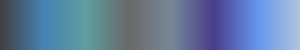

In [7]:
from PIL import Image
from IPython.display import display

def display_gradient_palette(palette):
    width, height = 300, 50
    gradient = Image.new('RGB', (width, height))

    for x in range(width):
        ratio = (x / (width - 1)) * (len(palette) - 1)
        idx = int(ratio)
        blend_ratio = ratio - idx
        c1 = palette[idx]
        c2 = palette[min(idx + 1, len(palette) - 1)]
        blend = tuple(
            int(c1[i] * (1 - blend_ratio) + c2[i] * blend_ratio)
            for i in range(3)
        )
        for y in range(height):
            gradient.putpixel((x, y), blend)
    display(gradient)

text = "Why are you such a problematic person"

emotion, score, palette = predict_emotion_and_palette(text)

print(f"Predicted Emotion: {emotion} (score: {score:.3f})")
print("Color Palette (RGB):", palette)

display_gradient_palette(palette)

Predicted Emotion: Relaxed (score: 0.116)
Color Palette (RGB): [(144, 238, 144), (173, 216, 230), (255, 239, 178), (176, 224, 230), (152, 251, 152), (255, 250, 205), (240, 255, 255), (224, 255, 255)]


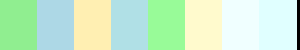

In [8]:
# Displaying final RGB color palette
def display_color_palette(palette, emotion):
    from PIL import Image, ImageDraw

    width = 300
    height = 50
    image = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(image)
    section_width = width // len(palette)

    for i, color in enumerate(palette):
        draw.rectangle(
            [i * section_width, 0, (i + 1) * section_width, height],
            fill=color
        )

    display(image)

# Example usage
text = "She moved forward in life because there was no other option"
emotion, score, palette = predict_emotion_and_palette(text)

print(f"Predicted Emotion: {emotion} (score: {score:.3f})")
print("Color Palette (RGB):", palette)

# Show the actual colors
display_color_palette(palette, emotion)